# Лабрраторная работа 3
## Акулич Кирилл 853504 (2 вариант)

$$ f(x,y) = \frac{1}{2}*sin(x+y)  \forall x, y: 0 \le x, y \le \frac{\pi}{2}$$

$$ 
    f(x) = \int_0^\frac{\pi}{2} \frac{1}{2}*sin(x+y) dy 
    f(x) = \frac{1}{2}*(sin(x) +cos(x)) = \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) 
$$

Функцию распределения СВ х:
$$
    F(x) = \int_0^x f(x) dx = \int_0^z \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) dx = \frac{\sqrt{2}}{2} * (sin(x-\pi/4) + \frac{\sqrt{2}}{2})
$$

Найдем функцию, обратную к данной
$$
    x = arcsin(\frac{2}{\sqrt{2}}*R_1 -  \frac{1}{\sqrt{2}}) + \pi/4
$$

Найдем условную функцию для y
$$
    f(y | x = x_1) = \frac{f(x_1,y)}{f(x_1)}
$$
$$
    F(y | x = x_1) = \int_0^\frac{\pi}{2} \frac{1}{2} * \frac{sin(x_1+y)}{f(x_1)}
$$
$$
    F(y | x = x_1) =\frac{1}{2*(f(x_1))}*(-cos(x_1 + y)-(-cos(x_1)))  
$$
$$
    cos(x_1) - 2*f(x_1)*R_2 = cos(x_1+y)
$$
$$
    y= arccos(cos(x_1)-2*f(x_1)*R_2) - x_1
$$

F(x) and inv(F(x))


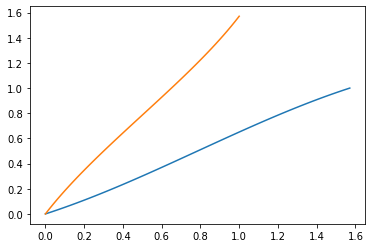

X hist


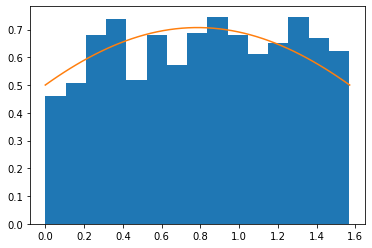

F(y) and inv(F(y)) x1:0.5


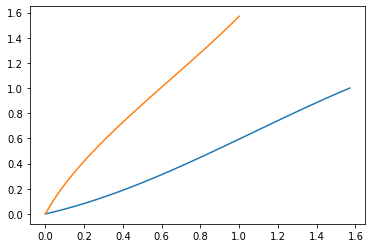

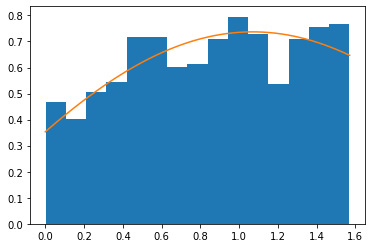

In [26]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

SQRT_2 = 2**(0.5)
SQRT_2_INV = 1 / SQRT_2

def f(x,y):
    return 0.5*np.sin(x+y)
def f_x(x):
    return SQRT_2_INV*np.cos(x-np.pi/4)
def F_X(x):
    return SQRT_2_INV*(math.sin(x-np.pi/4) + SQRT_2_INV)
def get_x(R1):
    return np.arcsin(SQRT_2*R1 - SQRT_2_INV) + np.pi/4

def get_y(R2,x1):
    return np.arccos(np.cos(x1) - 2* f_x(x1)*R2) - x1
def F_Y(y,x1):
    return 1/(2*f_x(x1))*(-np.cos(x1+y) +np.cos(x1))
def f_y(y,x1):
    return f(x1,y)/f_x(x1)
def vector_generator_2d():
    while True:
        R1 = random.random()
        R2 = random.random()
        x = get_x(R1)
        y = get_y(R2,x)
        yield (x,y)

def y_generator(x1):
    while True:
        R2 = random.random()
        y = get_y(R2,x1)
        yield y

x_y_points =list()
vector_2d_generator = vector_generator_2d()
for _ in range(1000):
    x,y = next(vector_2d_generator)
    x_y_points.append((x,y))
print("F(x) and inv(F(x))")
x_ls = np.linspace(0,np.pi/2)
_x = np.linspace(0,1)
plt.plot(x_ls,[F_X(x) for x in x_ls])
plt.plot(_x,[get_x(x) for x in _x])

plt.show()
print("X hist")
plt.hist([vector[0] for vector in x_y_points],bins=15,density=True)
plt.plot(x_ls,[f_x(x) for x in x_ls])
plt.show()

x1 = 0.5
print(f"F(y) and inv(F(y)) x1:{x1}")
y_ls = np.linspace(0,np.pi/2)
_y = np.linspace(0,1)

y_gen = y_generator(x1)
y_points = [next(y_gen) for _ in range(1000)]

plt.plot(y_ls,[F_Y(y,x1) for y in y_ls])
plt.plot(_y,[get_y(y,x1) for y in _y])
plt.show()

plt.hist([y for y in y_points],bins=15,density=True)
plt.plot(y_ls,[f_y(y,x1) for y in y_ls])
plt.show()


    

# Оценки случайной величины<br>
## Теоретические:<br>
### M(x),M(y): <br>

![](1.png)

### D(x),D(y):<br>
![](2.png)

### cor(x,y) <br>
$$
M(x,y) = -1 - \frac{\pi^2}{16} + \frac{\pi}{2}      
cor = -0.24

$$

$$
 M(x),M(y) =\frac{\pi}{4}
$$

$$
D(x),D(y) = -2 + \frac{\pi}{4} + \frac{\pi}{16}
$$


In [3]:
print(f"M(x) = {np.mean([vector[0] for vector in x_y_points])}")
print(f"M(y) = {np.mean([vector[1] for vector in x_y_points])}")


print(f"D(x) = {np.var([vector[0] for vector in x_y_points])}")
print(f"D(y) = {np.var([vector[1] for vector in x_y_points])}")

print(f"Corr(x,y): {np.corrcoef([vector[0] for vector in x_y_points],[vector[1] for vector in x_y_points])}")

M(x) = 0.771396751242007
M(y) = 0.7910557545389172
D(x) = 0.18885513822888575
D(y) = 0.18125778152658192
Corr(x,y): [[ 1.         -0.23376425]
 [-0.23376425  1.        ]]


Интервальные оценки

In [4]:
import scipy.stats as st

def m_confidence_interval(m_x, d_x, N, confidence_level = 0.95):
    normal_quantil = st.norm.ppf(confidence_level)
    return [m_x - np.sqrt(d_x / N) * normal_quantil, m_x + np.sqrt(d_x / N) * normal_quantil]

def d_confidence_interval(d_x, N, confidence_level = 0.95):
    xi_plus, xi_minus = st.chi2.ppf((1-confidence_level)/2,N-1), st.chi2.ppf((1+confidence_level)/2,N-1)
    return ((N - 1) * d_x / xi_minus, (N - 1) * d_x / xi_plus)


def arth_p(r):
    return np.log((1 + r) / (1 - r)) / 2.0

def th_z(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, n, alpha):
    z = arth_p(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = st.norm.ppf(1 - alpha/2)

    lo = z - z_crit * se
    hi = z + z_crit * se

    return (th_z(lo), th_z(hi))



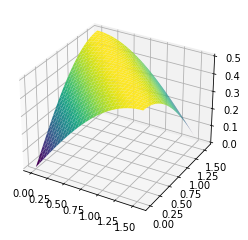

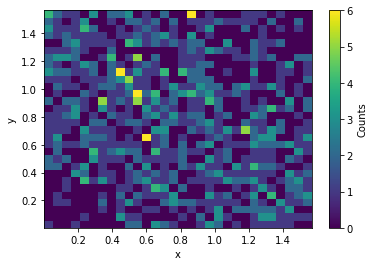

In [5]:
'''
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = [1/2]
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
'''

x = np.linspace(0, np.pi/2, 30)
y = np.linspace(0, np.pi/2, 30)

X, Y = np.meshgrid(x, y)
Z = 0.5*np.sin(X + Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.show()

fig2 = plt.figure()
N,x_bins,y_bins,_ = plt.hist2d([vector[0] for vector in x_y_points], [vector[1] for vector in x_y_points],bins=30)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()


Теоретические значения СВ:
M(X):
$$
    M(x) = \int_0^(\pi/2) f(x) = \pi/4
    D(x) = M[X^2] -(M[X])^2 = \pi^2/(4*\sqrt(2)) + \pi/\sqrt(2) - 4/\sqrt(2) - \pi^2/16 = 1.137 + 0.61685027506 = 1.795
    cov(x,y) = \int_0^(\pi/4) dx \int_0^(\pi/4) ((((x - pi/4)*(y - pi/4))/2)*sin(x + y), (y, 0, pi/2), (x, 0, pi/2)) = -0.0460539482731883
    corr = -0.02565679569536953
$$

# Дискретная СВ

In [34]:
import numpy as np
def check_if_independent(_matrix):
    matrix = np.array(_matrix)
    x_rows_count,y_columns_count = np.shape(matrix)
    x_p = [sum(x_row) for x_row in matrix]
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    for i in range(x_rows_count):
        for j in range(y_columns_count):
            if np.abs(x_p[i]*y_p[j] - matrix[i,j]) > 10e-10 :
                return False
    return True

def find_dependent_x(_matrix):
    matrix = np.array(_matrix)
    _,y_columns_count = np.shape(matrix)
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    dependent_dist = []
    for y_col_indx in range(y_columns_count):
        dependent_dist.append(matrix[:,y_col_indx]/y_p[y_col_indx])
    return np.transpose(dependent_dist)

def find_dependent_y(_matrix):
    matrix = np.array(_matrix)
    x_rows_count,y_columns_count = np.shape(matrix)
    x_p = [sum(x_row) for x_row in matrix]
    dependent_dist = []
    for x_row_indx in range(x_rows_count):
        dependent_dist.append(matrix[x_row_indx]/x_p[x_row_indx])
    return np.array(dependent_dist)


x_p = [0.2, 0.3, 0.05, 0.1, 0.05, 0.1, 0.2]
y_p = [0.3, 0.2, 0.1, 0.05, 0.15, 0.2]
matrix = [[i * j for i in y_p] for j in x_p]

print(check_if_independent(matrix))
print("X|Y")
print(find_dependent_x(matrix))
print("Y|X")
print(find_dependent_y(matrix))


[[0.06, 0.04000000000000001, 0.020000000000000004, 0.010000000000000002, 0.03, 0.04000000000000001], [0.09, 0.06, 0.03, 0.015, 0.045, 0.06], [0.015, 0.010000000000000002, 0.005000000000000001, 0.0025000000000000005, 0.0075, 0.010000000000000002], [0.03, 0.020000000000000004, 0.010000000000000002, 0.005000000000000001, 0.015, 0.020000000000000004], [0.015, 0.010000000000000002, 0.005000000000000001, 0.0025000000000000005, 0.0075, 0.010000000000000002], [0.03, 0.020000000000000004, 0.010000000000000002, 0.005000000000000001, 0.015, 0.020000000000000004], [0.06, 0.04000000000000001, 0.020000000000000004, 0.010000000000000002, 0.03, 0.04000000000000001]]
True
X|Y
[[0.2  0.2  0.2  0.2  0.2  0.2 ]
 [0.3  0.3  0.3  0.3  0.3  0.3 ]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.05 0.05 0.05 0.05 0.05 0.05]
 [0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.2  0.2  0.2  0.2  0.2  0.2 ]]
Y|X
[[0.3  0.2  0.1  0.05 0.15 0.2 ]
 [0.3  0.2  0.1  0.05 0.15 0.2 ]
 [0.3  0.2  0.1  0.05 0.15 0.2

[0.2, 0.3, 0.05, 0.1, 0.05, 0.1, 0.2]
X seq


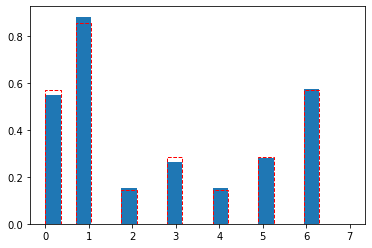

Y seq


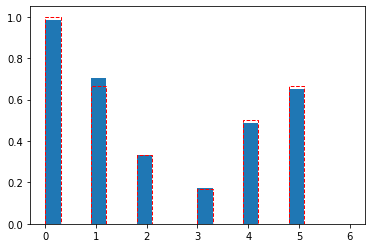

In [59]:
import random
import bisect
def discrete_vector_generator(_matrix):
    def _first(it,condition):
        return next(x for x in it if condition(x))
    def lot_method(p):
        _p = random.random()
        _cumsum = enumerate(np.cumsum(p))
        success_event = _first(_cumsum, lambda x : _p <=x[1])[0]
        return success_event

    matrix = np.array(_matrix)
    x_p = [sum(x_row) for x_row in matrix]
    y_dep = find_dependent_y(_matrix)
    print(x_p)
    while True:
        x_indx = lot_method(x_p)
        y_indx = lot_method(y_dep[x_indx])
        yield x_indx,y_indx

def get_p_x(_matrix):
    matrix = np.array(_matrix)
    x_rows_count,y_columns_count = np.shape(matrix)
    x_p = [sum(x_row) for x_row in matrix]
    return x_p

def get_p_y(_matrix):
    matrix = np.array(_matrix)
    _,y_columns_count = np.shape(matrix)
    y_p = [sum(matrix[:,i]) for i in range(y_columns_count)]
    return y_p

gen = discrete_vector_generator(matrix)
seq = []

for i in range(5000):
    seq.append(next(gen))

x_seq = [s[0] for s in seq]
y_seq = [s[1] for s in seq]
p = [random.gauss(4,2) for _ in range(400)]
p_x = get_p_x(matrix)
print("X seq")
plt.hist(x_seq, bins=20, range=(0, len(p_x)), density=True)
plt.hist(np.arange(0, len(p_x)), bins=20, range=(0, len(p_x)),
                                        density=True, weights=p_x, histtype='stepfilled',
                                        facecolor='none', edgecolor='red', linestyle='--')
plt.show()
#plt.hist(get_p_x(matrix),bins = range(len(x_seq))  ,alpha=0.5, label='theoretical')

print("Y seq")

p_y = get_p_y(matrix)
plt.hist(y_seq, bins=20, range=(0, len(p_y)), density=True)
plt.hist(np.arange(0, len(p_y)), bins=20, range=(0, len(p_y)),
                                        density=True, weights=p_y, histtype='stepfilled',
                                        facecolor='none', edgecolor='red', linestyle='--')
plt.show()

In [63]:
def get_theory_mean(p_values):
    return sum([i  * p for i, p in enumerate(p_values)])

def get_theory_d(p_values):
    exp_val = get_theory_mean(p_values)
    return sum([(i - exp_val) ** 2 * p for i, p in enumerate(p_values)])

mx, my = get_theory_mean(p_x), get_theory_mean(p_y)
dx, dy = get_theory_d(p_x), get_theory_d(p_y)

print(mx,my)
print(dx,dy)

print(f"M(x) = {np.mean(x_seq)}")
print(f"M(y) = {np.mean(y_seq)}")


print(f"D(x) = {np.var(x_seq)}")
print(f"D(y) = {np.var(y_seq)}")

print(f"Corr(x,y): {np.corrcoef(x_seq,y_seq)}")


2.6000000000000005 2.1500000000000004
5.140000000000001 3.8275000000000006
M(x) = 2.6074
M(y) = 2.1288
D(x) = 5.119665240000001
D(y) = 3.7734105600000003
Corr(x,y): [[ 1.         -0.01233891]
 [-0.01233891  1.        ]]
